In [118]:
import utilities.color as clr
import utilities.ocr as ocr

import matplotlib.pyplot as plt
import cv2
import numpy as np
import pytesseract

MONITOR = {"top": 855, "left": 0, "width": 693, "height": 138}
BOTTOM_LEFT_WINDOW = {"top": 540, "left": 0, "width": 770, "height": 505}
PICS_DIR = "../pics/"

In [119]:
def read_image(filename):
    return cv2.imread(PICS_DIR+filename, cv2.IMREAD_COLOR)
    
    
def show_image(*var_images, size="small"):
    """ Displays all images side by side.
    """
    if size == "small":
        figsize = (5, 5)
    elif size == "medium":
        figsize = (8, 8)
    elif size == "large":
        figsize = (12, 12)
    
    rgb_images = []
    for an_image in var_images:
        an_image = cv2.cvtColor(an_image, cv2.COLOR_BGRA2RGB)
        rgb_images.append(an_image)
    
    NUM_ROWS = 1
    IMGs_IN_ROW = len(rgb_images)
      
    #  Note to self: global image size setting:
    # plt.rcParams["figure.figsize"] = (20, 10)
    f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=figsize)

    if len(rgb_images) == 1:
        ax.imshow(rgb_images[0])
    else:
        for i, rgb in enumerate(rgb_images):
            ax[i].imshow(rgb)
    
    plt.tight_layout()
    plt.show()

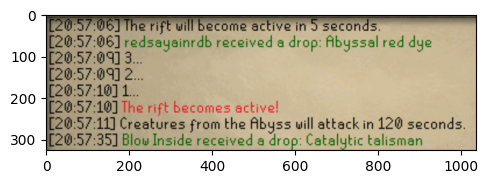

In [120]:
chatbox = read_image("chatbox_example.png")
show_image(chatbox, size="small")

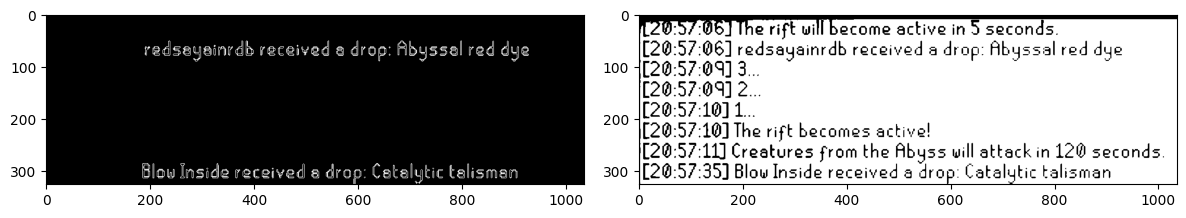

In [121]:
# Theirs
# OFF_GREEN = Color([0, 100, 0], [30, 255, 255])
# What I measured with color tool.
# OFF_GREEN_2 = clr.Color([69, 114, 49], [150, 161, 140])

# the thought process I had here was to keep the bands that I measured as smaller than OS-bot-color
# Shrinking the first band (Red) looks to have done the most to help capture what we want.
OFF_GREEN_2 = clr.Color([40, 114, 0], [120, 161, 140])

OFF_RED = clr.Color([100, 100, 0], [255, 255, 255])

image = clr.isolate_colors(chatbox, OFF_GREEN_2)
image_2 = clr.isolate_colors(chatbox, OFF_RED)
show_image(image, image_2, size="large")

In [122]:
pytesseract.image_to_string(image_2).split("\n")

['Of: rift will become active in 5 seconds.',
 '[20:57:06] redsayainrdb received a drop: Abyssal red dye',
 '[29:57:09] 3...',
 '',
 '[29:57:09] 2...',
 '',
 '[20:57:10] 1...',
 '',
 '[29:57:10] The rift becomes active!',
 '',
 '(20:37:11) Creatures from the Abyss vill attack in 120 seconds.',
 '[28:57:35] Blow Inside received a drop: Catalytic talisman',
 '']

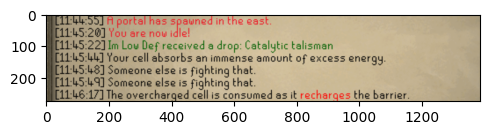

11:44:55] A portal has spawned in the east.
11:45:20] You are now idle!
11:45:22] Im Low Def received a drop: Catalytic talisman
11:45:44] Your cell absorbs an immense amount of excess energy.
11:45:48] Someone else is fighting that.
11:45:49] Someone else is fighting that.
11:46:17] The overcharged cell is consumed as it recharges the barrier.


In [132]:
import mss

def get_screenshot(monitor=MONITOR):
    with mss.mss() as screenshot:
        return numpy.array(screenshot.grab(monitor))


def get_screenshot_bgr(monitor=MONITOR):
    """Takes from 0.075 to 0.1 seconds"""
    screenshot = get_screenshot(monitor)
    return cv2.cvtColor(screenshot, cv2.COLOR_BGRA2BGR)

screenshot = get_screenshot_bgr(MONITOR)
show_image(screenshot, size="small")

text = pytesseract.image_to_string(screenshot).split("\n")
text = list(filter(lambda t: t != '', text))
for line in text:
    print(line)

In [108]:
# ocr.extract_text(image_2, ocr.PLAIN_12, [OFF_GREEN_2])
# char_list = []

# for key in ocr.PLAIN_12:
#     print(key)
#     correlation = cv2.matchTemplate(image_2, ocr.PLAIN_12[key][2:], cv2.TM_CCOEFF_NORMED)
#     y_mins, x_mins = np.where(correlation >= 0.98)
#     char_list.extend([key, x, y] for x, y in zip(x_mins, y_mins))

# print(char_list)

''